In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

In [2]:
data = make_blobs(n_samples=300, n_features=2, 
                  centers=2, cluster_std=1.0, random_state=42)

In [3]:
X, y = data

In [4]:
np.random.seed(101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [5]:
df = pd.DataFrame(X)
df = pd.concat([df, z_noise], axis=1)

In [6]:
df.columns = ['X1', 'X2', 'X3']

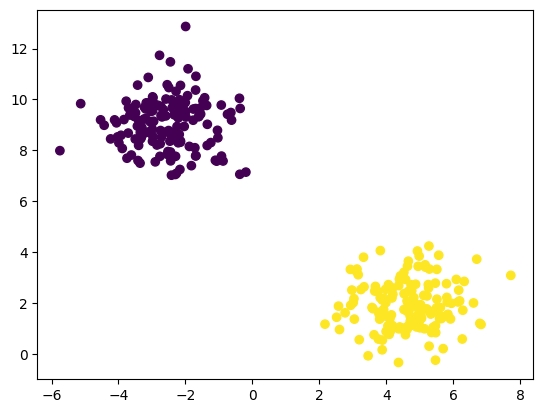

In [7]:
plt.scatter(df['X1'],df['X2'], c=y)
plt.show()

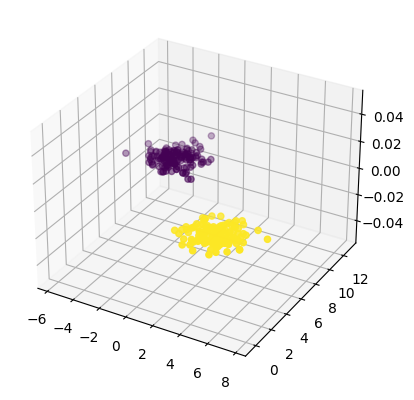

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['X1'],df['X2'], c=y)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [10]:
# 3 ----> 2 ----->

In [11]:
encoder = Sequential()
encoder.add(Dense(2, activation='relu', input_shape=[3,]))

decoder = Sequential()
encoder.add(Dense(3, activation='relu', input_shape=[2,]))

autoencoder = Sequential([encoder, decoder])

In [12]:
autoencoder.compile(loss='mse', optimizer = SGD(learning_rate=1.5))

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [14]:
autoencoder.fit(scaled_data, scaled_data, epochs=10)

Epoch 1/10
10/10 [==============================] - 1s 3ms/step - loss: 0.1623
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1281
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 0.1029
Epoch 4/10
10/10 [==============================] - 0s 2ms/step - loss: 0.1012
Epoch 5/10
10/10 [==============================] - 0s 2ms/step - loss: 0.1022
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1006
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 0.1000
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1001
Epoch 9/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1002
Epoch 10/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0999


In [15]:
encoded_2dim = encoder.predict(scaled_data)

10/10 [==============================] - 0s 2ms/step


In [16]:
encoded_2dim.shape

(300, 3)

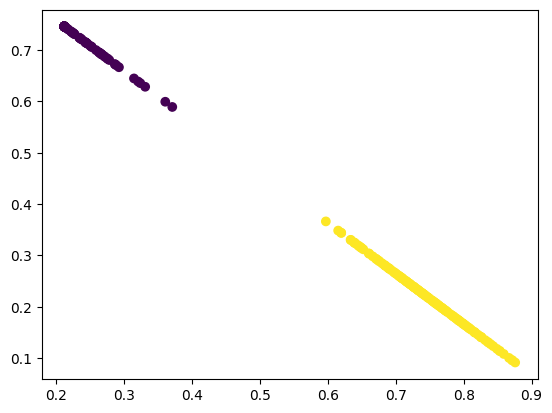

In [18]:
plt.scatter(encoded_2dim[:,0], encoded_2dim[:,1], c=y)